# Backtesting with Stock Market

In [1]:
import numpy as np
import pandas as pd
#อัพเดท DeeperTradeLibrary ก่อนนะครับ
#pip install git+https://github.com/palmbook/DeeperTradeLibrary.git --upgrade
import DeeperTradeLibrary as dpt
%matplotlib inline

### Fuction for simple backtesting

## Begin your first simple condition base model

In [2]:
df_gulf = pd.read_csv('GULF_M15.csv', delimiter='\t')
df = df_gulf.copy()
df['<TIME>'] = df['<DATE>'] + ' ' + df['<TIME>']
df.drop(['<DATE>', '<TICKVOL>', '<SPREAD>'], inplace=True, axis=1)
df.columns = ['time', 'open', 'high', 'low', 'close', 'volume']
df['time'] = pd.to_datetime(df['time'])
#df = df.set_index('time')
df.head()

,time,open,high,low,close,volume
0,2017-12-07 09:45:00,54.00,54.00,53.75,54.00,1810200
1,2017-12-07 10:00:00,54.00,54.00,53.00,53.25,9591900
2,2017-12-07 10:15:00,53.25,53.50,53.25,53.50,688500
3,2017-12-07 10:30:00,53.75,53.75,53.50,53.50,239700
4,2017-12-07 10:45:00,53.50,54.00,53.50,53.75,1849800


In [3]:
df['sma50'] = df.close.rolling(50).mean()
df['sma200'] = df.close.rolling(500).mean()
df.dropna(inplace=True)

In [4]:
df['signal'] = df['sma50'] > df['sma200']

In [5]:
df.head()

,time,open,high,low,close,volume,sma50,sma200,signal
499,2018-01-12 16:15:00,75.75,76.0,75.50,75.75,1576000,70.925,60.5515,True
500,2018-01-12 16:30:00,76.50,76.5,76.50,76.50,969200,71.095,60.5965,True
501,2018-01-15 09:45:00,76.25,76.5,76.25,76.25,461900,71.260,60.6425,True
502,2018-01-15 10:00:00,76.50,78.0,76.00,78.00,4118000,71.450,60.6915,True
503,2018-01-15 10:15:00,78.00,78.5,77.75,78.50,3500700,71.635,60.7415,True


In [6]:
result = dpt.Backtest.stock_trade_simulation(df, shares=10000, commission=0.5, vat=7.0)

In [7]:
result

,type,open_time,open_price,close_time,close_price,length,shares,profit,commission,pnl,equity
0,True,2018-01-12 16:15:00,75.75,2018-02-05 15:00:00,71.75,330,10000,-40000.0,265.12,-40265.12,-40265.12
1,True,2018-02-13 11:30:00,75.25,2018-02-22 14:15:00,72.00,151,10000,-32500.0,263.38,-32763.38,-73028.50
2,True,2018-02-27 14:15:00,74.50,2018-03-02 15:00:00,72.00,45,10000,-25000.0,260.75,-25260.75,-98289.25
3,True,2018-03-07 15:45:00,73.25,2018-03-08 12:15:00,73.00,14,10000,-2500.0,256.38,-2756.38,-101045.63
4,True,2018-04-30 15:45:00,67.25,2018-05-31 14:15:00,67.75,434,10000,5000.0,235.38,4764.62,-96281.01
5,True,2018-07-23 11:30:00,64.75,2018-07-26 12:00:00,63.50,65,10000,-12500.0,226.63,-12726.63,-109007.64
6,True,2018-08-02 09:45:00,64.50,2018-09-06 15:30:00,67.50,520,10000,30000.0,225.75,29774.25,-79233.39
7,True,2018-09-10 16:15:00,69.25,2018-11-19 11:30:00,76.00,995,10000,67500.0,242.38,67257.62,-11975.77
8,True,2018-12-13 14:45:00,77.00,2018-12-18 09:45:00,75.75,50,10000,-12500.0,269.50,-12769.50,-24745.27
9,True,2018-12-18 10:45:00,76.25,2019-03-06 16:30:00,88.25,1128,10000,120000.0,266.88,119733.12,94987.85


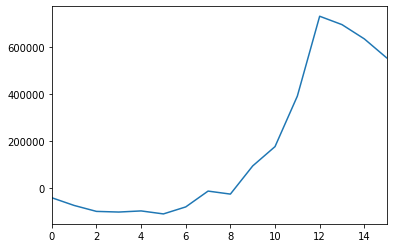

In [8]:
result.equity.plot()